In [9]:
import sys
print sys.version
print sys.version_info

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

2.7.12 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:43:17) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]
sys.version_info(major=2, minor=7, micro=12, releaselevel='final', serial=0)


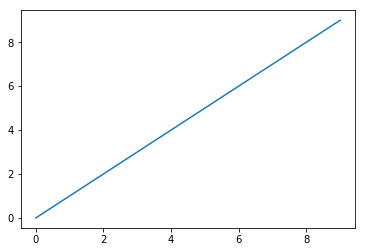

In [6]:
plt.plot(range(10), range(10))
plt.show()

In [10]:
dat_knn = pd.read_excel('dat_knn.xlsx')

In [11]:
dat_knn[['run_dist', 'difficulty', 'is_workout']].head()

,run_dist,difficulty,is_workout
171,10.0,3,1
225,10.0,1,1
226,8.0,1,1
227,11.0,1,1
228,8.0,1,0


In [59]:
train, test = train_test_split(dat_knn, test_size = 0.3)
#print take_xs(train).shape

neighbors_run = KNN(n_neighbors=1380)
neighbors_run.fit(train[['run_dist', 'difficulty', 'is_workout']], train['run_dist_1'])
y_pred_run = neighbors_run.predict(test[['run_dist', 'difficulty', 'is_workout']])
r_run = neighbors_run.score(test[['run_dist', 'difficulty', 'is_workout']], test['run_dist_1'])

neighbors_work = KNN(n_neighbors=1)
neighbors_work.fit(train[['run_dist', 'difficulty', 'is_workout']], train['is_workout_1'])
y_pred_work = neighbors_work.predict(test[['run_dist', 'difficulty', 'is_workout']])

#r_work = neighbors_work.score(test[['run_dist', 'difficulty', 'is_workout']], test['is_workout_1'])

In [60]:
print(r_run)
#print(r_work)

sum(y_pred_work == test['is_workout_1'])/float(len(test['is_workout_1']))

-0.00166817635372


0.7246621621621622

In [69]:
avg_rsq_weight = [None]*50
avg_rsq_unweight = [None]*50
for k in range(50):
    rsq_weight = [None]*20
    rsq_unweight = [None]*20
    for i in range(20):
        train, test = train_test_split(dat_knn, test_size = 0.3)
        # Unweighted
        neighbors_run_un = KNN(n_neighbors=k+1)
        neighbors_run_un.fit(train[['run_dist', 'difficulty', 'is_workout']], train['run_dist_1'])
        y_pred_run_un = neighbors_run_un.predict(test[['run_dist', 'difficulty', 'is_workout']])
        r_run_un = neighbors_run_un.score(test[['run_dist', 'difficulty', 'is_workout']], test['run_dist_1'])
        rsq_unweight[i] = r_run_un
        # Weighted
        neighbors_run_w = KNN(n_neighbors=k+1, weights='distance')
        neighbors_run_w.fit(train[['run_dist', 'difficulty', 'is_workout']], train['run_dist_1'])
        y_pred_run_w = neighbors_run_w.predict(test[['run_dist', 'difficulty', 'is_workout']])
        r_run_w = neighbors_run_w.score(test[['run_dist', 'difficulty', 'is_workout']], test['run_dist_1'])
        rsq_weight[i] = r_run_w
    avg_rsq_weight[k] = float(sum(rsq_weight))/len(rsq_weight)
    avg_rsq_unweight[k] = float(sum(rsq_unweight))/len(rsq_unweight)

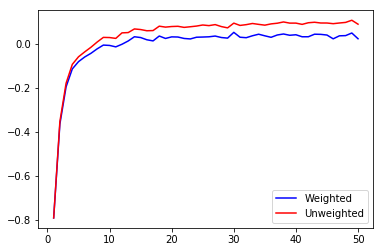

In [74]:
plt.plot(range(1,51), avg_rsq_weight, c='b', label='Weighted')
plt.plot(range(1,51), avg_rsq_unweight, c='r', label='Unweighted')
plt.legend(['Weighted', 'Unweighted'])
plt.show()

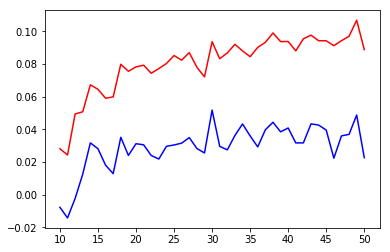

In [72]:
plt.plot(range(10,51), avg_rsq_weight[9:], c='b')
plt.plot(range(10,51), avg_rsq_unweight[9:], c='r')
plt.show()

In [48]:
avg_rsq[21]

0.038406018252256244

In [14]:
y_pred_run

array([  7.2875,  10.425 ,   6.95  ,   6.95  ,   5.66  ,   8.05  ,
         8.2875,   7.41  ,   6.3575,   8.275 ,   7.7   ,   7.1375,
         6.0125,   7.45  ,   7.45  ,   9.055 ,   7.95  ,   5.695 ,
         7.85  ,   7.5   ,   6.95  ,   4.835 ,   6.95  ,   8.85  ,
         8.275 ,   3.45  ,   7.75  ,   7.1375,   7.1375,   6.91  ,
         5.775 ,   6.0125,   7.5725,   6.675 ,   5.4225,   3.91  ,
         9.055 ,   6.0125,   8.115 ,   5.4075,   8.8   ,   7.95  ,
         6.95  ,   9.055 ,   5.695 ,   3.91  ,   3.925 ,   6.275 ,
         7.95  ,   8.275 ,  10.425 ,   5.695 ,   5.6425,   9.775 ,
         6.95  ,   5.4225,   8.115 ,   6.175 ,   8.275 ,   8.275 ,
         9.055 ,   8.1025,   4.32  ,   7.975 ,   7.45  ,   5.25  ,
         7.75  ,   8.8   ,   7.75  ,   7.1375,   3.91  ,   6.175 ,
         9.15  ,   6.075 ,   6.91  ,   6.675 ,   8.1025,   8.2875,
         3.45  ,   6.95  ,   8.85  ,   8.05  ,   8.8   ,   7.75  ,
         6.175 ,   8.275 ,   8.275 ,   8.8   ,   5.4225,   6.7

In [15]:
pd.DataFrame({'run_dist':test['run_dist'], 'difficulty':test['difficulty'], 'is_workout':test['is_workout'], 
              'run_dist_1':test['run_dist_1'], 'run_dist_predict':y_pred_run, 'workout_pred':y_pred_work}) 

,difficulty,is_workout,run_dist,run_dist_1,run_dist_predict,workout_pred
256,3,1,8.00,8.00,7.2875,1.0
59,2,0,12.00,11.00,10.4250,1.0
366,1,0,6.00,12.00,6.9500,0.0
330,1,0,6.00,5.00,6.9500,0.0
420,2,0,4.00,10.00,5.6600,0.0
301,4,0,15.00,10.00,8.0500,0.0
264,3,0,6.00,6.00,8.2875,0.0
149,1,0,4.00,0.00,7.4100,0.0
355,4,0,10.50,10.00,6.3575,0.0
375,1,0,10.00,10.00,8.2750,1.0


In [48]:
pred = neighbors_run.predict(np.array([10,1,0]).reshape(1,-1))
pred

array([ 9.535])

In [46]:
np.array([10,1,0]).reshape(1,-1).shape

(1, 3)

In [50]:
#train, test = train_test_split(dat_knn, test_size = 0.3)
#print take_xs(train).shape
r_runs = [None]*40
for k in range(1,40):
    neighbors_run = KNN(n_neighbors=k)
    neighbors_run.fit(train[['run_dist', 'difficulty', 'is_workout']], train['run_dist_1'])
    y_pred_run = neighbors_run.predict(test[['run_dist', 'difficulty', 'is_workout']])
    r_runs[k-1] = neighbors_run.score(test[['run_dist', 'difficulty', 'is_workout']], test['run_dist_1'])

In [51]:
plt.plot(r_runs)

NameError: name 'plt' is not defined